Классы дорожных объектов для распознавания в данной работе: легковой автомобиль, дорожный знак, светофор, пешеход, грузовик, автобус, двухколесный транспорт (велосипед или мотоцикл), человек на двухколёсном транспорте (велосипеде или мотоцикле).


image 1/1 C:\Users\odara\Downloads\data\val\images\b2a8e8b4-50058f09.jpg: 448x768 14 cars, 3 traffic signs, 4 traffic lights, 12 persons, 1 truck, 15.4ms
Speed: 4.7ms preprocess, 15.4ms inference, 88.1ms postprocess per image at shape (1, 3, 448, 768)


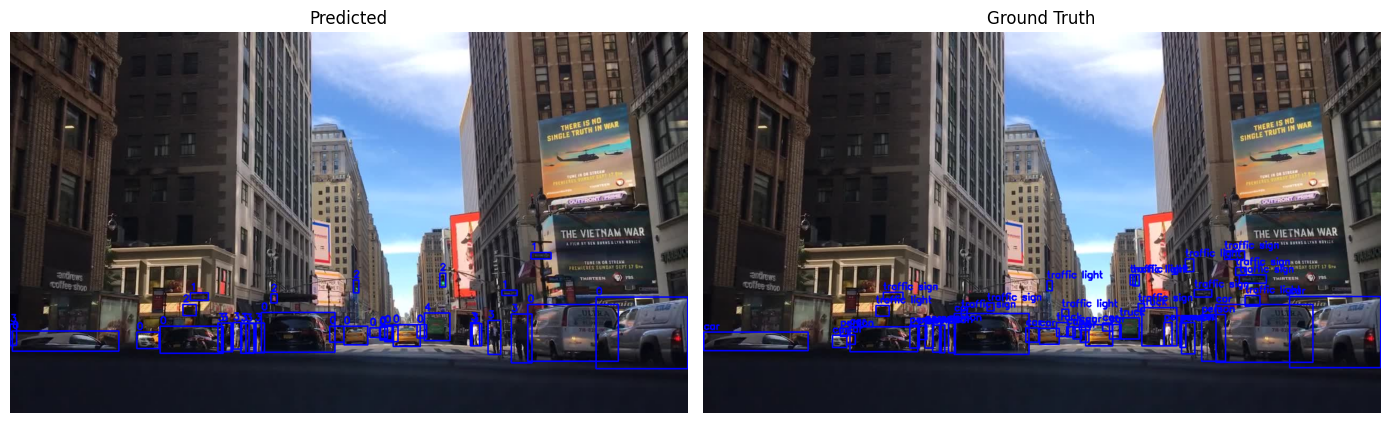


Evaluation for image: b2a8e8b4-50058f09.jpg
Total GT objects     : 45
Predicted objects    : 34
Matched objects (IoU>=0.5) : 23
Precision            : 0.68
Recall               : 0.51
Correct class ratio  : 1.00


In [1]:
import cv2
import json
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# Параметры
image_path = r"C:\Users\odara\Downloads\data\val\images\b2a8e8b4-50058f09.jpg"
model_path = r"C:\Users\odara\Downloads\data\yolo_fine_tuning\yolov8n_bdd100k\weights\best.pt"
bdd_labels_path = r"C:\Users\odara\Downloads\data\labels_new\bdd100k_labels_images_val.json"
iou_threshold = 0.5

# Загрузка модели YOLOv8
model = YOLO(model_path)

# Предсказания YOLO
results = model(image_path)[0]

# Координаты и классы предсказанных объектов
pred_boxes = results.boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]
pred_classes = results.boxes.cls.cpu().numpy().astype(int)
pred_scores = results.boxes.conf.cpu().numpy()

# Загрузка аннотаций BDD100K
with open(bdd_labels_path, 'r') as f:
    bdd_data = json.load(f)

image_name = Path(image_path).name
gt_boxes = []
gt_classes = []

# Извлечение аннотаций для текущего изображения
for item in bdd_data:
    if item['name'] == image_name:
        for label in item['labels']:
            box2d = label.get('box2d')
            if box2d:
                x1, y1 = box2d['x1'], box2d['y1']
                x2, y2 = box2d['x2'], box2d['y2']
                gt_boxes.append([x1, y1, x2, y2])
                gt_classes.append(label['category'])
        break

# Сопоставление классов с YOLO (переопределите при необходимости)
class_names = model.names

def draw_boxes(image, boxes, classes, title, is_pred=False):
    image = image.copy()
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cls = classes[i]
        label = class_names[cls] if is_pred else cls
        color = (0, 255, 0) if is_pred else (255, 0, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, str(label), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

# Вывод изображений
original = cv2.imread(image_path)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
draw_boxes(original, pred_boxes, pred_classes, "Predicted")

plt.subplot(1, 2, 2)
draw_boxes(original, gt_boxes, gt_classes, "Ground Truth")

plt.tight_layout()
plt.show()

# Оценка качества предсказаний
def compute_iou(box1, box2):
    # box: [x1, y1, x2, y2]
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2]-box1[0]) * (box1[3]-box1[1])
    box2_area = (box2[2]-box2[0]) * (box2[3]-box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0

# Сравнение предсказаний с GT
matched = 0
correct_class = 0

used_gt = set()
for i, pbox in enumerate(pred_boxes):
    for j, gtbox in enumerate(gt_boxes):
        if j in used_gt:
            continue
        iou = compute_iou(pbox, gtbox)
        if iou >= iou_threshold:
            matched += 1
            used_gt.add(j)
            if class_names[pred_classes[i]] == gt_classes[j]:
                correct_class += 1
            break

total_gt = len(gt_boxes)
precision = matched / len(pred_boxes) if pred_boxes.any() else 0
recall = matched / total_gt if total_gt else 0
cls_accuracy = correct_class / matched if matched else 0

print(f"\nEvaluation for image: {image_name}")
print(f"Total GT objects     : {total_gt}")
print(f"Predicted objects    : {len(pred_boxes)}")
print(f"Matched objects (IoU>={iou_threshold}) : {matched}")
print(f"Precision            : {precision:.2f}")
print(f"Recall               : {recall:.2f}")
print(f"Correct class ratio  : {cls_accuracy:.2f}")


image 1/1 C:\Users\odara\Downloads\data\val\images\b3e72283-d9fc39b0.jpg: 448x768 10 cars, 6 traffic signs, 4 traffic lights, 2 trucks, 11.3ms
Speed: 2.4ms preprocess, 11.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 768)


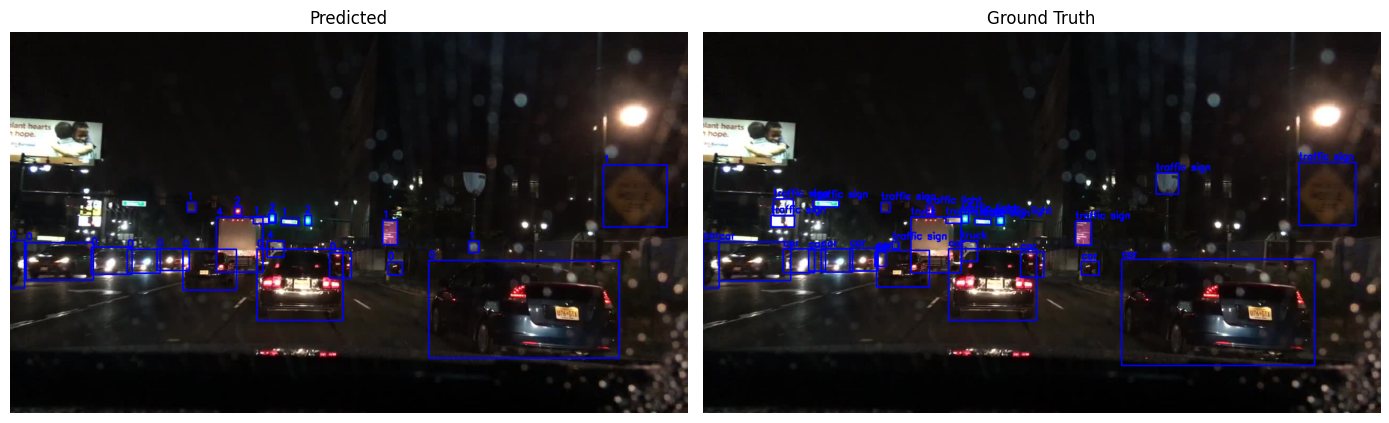


Evaluation for image: b3e72283-d9fc39b0.jpg
Total GT objects     : 27
Predicted objects    : 22
Matched objects (IoU>=0.5) : 20
Precision            : 0.91
Recall               : 0.74
Correct class ratio  : 1.00


In [2]:
import cv2
import json
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# Параметры
image_path = r"C:\Users\odara\Downloads\data\val\images\b3e72283-d9fc39b0.jpg"
model_path = r"C:\Users\odara\Downloads\data\yolo_fine_tuning\yolov8n_bdd100k\weights\best.pt"
bdd_labels_path = r"C:\Users\odara\Downloads\data\labels_new\bdd100k_labels_images_val.json"
iou_threshold = 0.5

# Загрузка модели YOLOv8
model = YOLO(model_path)

# Предсказания YOLO
results = model(image_path)[0]

# Координаты и классы предсказанных объектов
pred_boxes = results.boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]
pred_classes = results.boxes.cls.cpu().numpy().astype(int)
pred_scores = results.boxes.conf.cpu().numpy()

# Загрузка аннотаций BDD100K
with open(bdd_labels_path, 'r') as f:
    bdd_data = json.load(f)

image_name = Path(image_path).name
gt_boxes = []
gt_classes = []

# Извлечение аннотаций для текущего изображения
for item in bdd_data:
    if item['name'] == image_name:
        for label in item['labels']:
            box2d = label.get('box2d')
            if box2d:
                x1, y1 = box2d['x1'], box2d['y1']
                x2, y2 = box2d['x2'], box2d['y2']
                gt_boxes.append([x1, y1, x2, y2])
                gt_classes.append(label['category'])
        break

# Сопоставление классов с YOLO (переопределите при необходимости)
class_names = model.names

def draw_boxes(image, boxes, classes, title, is_pred=False):
    image = image.copy()
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cls = classes[i]
        label = class_names[cls] if is_pred else cls
        color = (0, 255, 0) if is_pred else (255, 0, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, str(label), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

# Вывод изображений
original = cv2.imread(image_path)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
draw_boxes(original, pred_boxes, pred_classes, "Predicted")

plt.subplot(1, 2, 2)
draw_boxes(original, gt_boxes, gt_classes, "Ground Truth")

plt.tight_layout()
plt.show()

# Оценка качества предсказаний
def compute_iou(box1, box2):
    # box: [x1, y1, x2, y2]
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2]-box1[0]) * (box1[3]-box1[1])
    box2_area = (box2[2]-box2[0]) * (box2[3]-box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0

# Сравнение предсказаний с GT
matched = 0
correct_class = 0

used_gt = set()
for i, pbox in enumerate(pred_boxes):
    for j, gtbox in enumerate(gt_boxes):
        if j in used_gt:
            continue
        iou = compute_iou(pbox, gtbox)
        if iou >= iou_threshold:
            matched += 1
            used_gt.add(j)
            if class_names[pred_classes[i]] == gt_classes[j]:
                correct_class += 1
            break

total_gt = len(gt_boxes)
precision = matched / len(pred_boxes) if pred_boxes.any() else 0
recall = matched / total_gt if total_gt else 0
cls_accuracy = correct_class / matched if matched else 0

print(f"\nEvaluation for image: {image_name}")
print(f"Total GT objects     : {total_gt}")
print(f"Predicted objects    : {len(pred_boxes)}")
print(f"Matched objects (IoU>={iou_threshold}) : {matched}")
print(f"Precision            : {precision:.2f}")
print(f"Recall               : {recall:.2f}")
print(f"Correct class ratio  : {cls_accuracy:.2f}")


image 1/1 C:\Users\odara\Downloads\data\val\images\b563b270-0fe8e937.jpg: 448x768 11 cars, 5 traffic signs, 11 traffic lights, 1 person, 10.2ms
Speed: 1.5ms preprocess, 10.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 768)


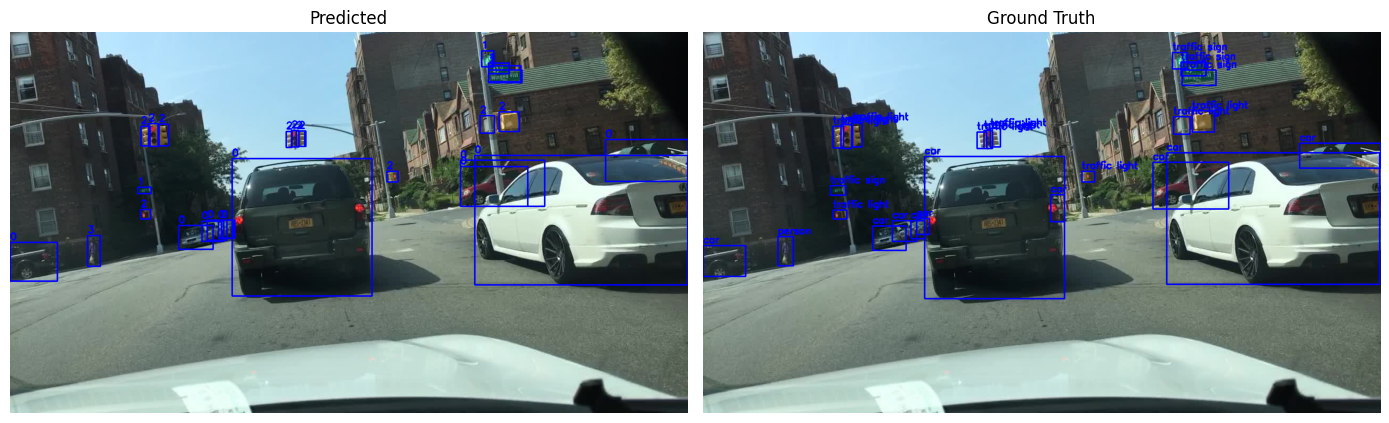


Evaluation for image: b563b270-0fe8e937.jpg
Total GT objects     : 25
Predicted objects    : 28
Matched objects (IoU>=0.5) : 24
Precision            : 0.86
Recall               : 0.96
Correct class ratio  : 1.00


In [4]:
import cv2
import json
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# Параметры
image_path = r"C:\Users\odara\Downloads\data\val\images\b563b270-0fe8e937.jpg"
model_path = r"C:\Users\odara\Downloads\data\yolo_fine_tuning\yolov8n_bdd100k\weights\best.pt"
bdd_labels_path = r"C:\Users\odara\Downloads\data\labels_new\bdd100k_labels_images_val.json"
iou_threshold = 0.5

# Загрузка модели YOLOv8
model = YOLO(model_path)

# Предсказания YOLO
results = model(image_path)[0]

# Координаты и классы предсказанных объектов
pred_boxes = results.boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]
pred_classes = results.boxes.cls.cpu().numpy().astype(int)
pred_scores = results.boxes.conf.cpu().numpy()

# Загрузка аннотаций BDD100K
with open(bdd_labels_path, 'r') as f:
    bdd_data = json.load(f)

image_name = Path(image_path).name
gt_boxes = []
gt_classes = []

# Извлечение аннотаций для текущего изображения
for item in bdd_data:
    if item['name'] == image_name:
        for label in item['labels']:
            box2d = label.get('box2d')
            if box2d:
                x1, y1 = box2d['x1'], box2d['y1']
                x2, y2 = box2d['x2'], box2d['y2']
                gt_boxes.append([x1, y1, x2, y2])
                gt_classes.append(label['category'])
        break

# Сопоставление классов с YOLO (переопределите при необходимости)
class_names = model.names

def draw_boxes(image, boxes, classes, title, is_pred=False):
    image = image.copy()
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cls = classes[i]
        label = class_names[cls] if is_pred else cls
        color = (0, 255, 0) if is_pred else (255, 0, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, str(label), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

# Вывод изображений
original = cv2.imread(image_path)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
draw_boxes(original, pred_boxes, pred_classes, "Predicted")

plt.subplot(1, 2, 2)
draw_boxes(original, gt_boxes, gt_classes, "Ground Truth")

plt.tight_layout()
plt.show()

# Оценка качества предсказаний
def compute_iou(box1, box2):
    # box: [x1, y1, x2, y2]
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2]-box1[0]) * (box1[3]-box1[1])
    box2_area = (box2[2]-box2[0]) * (box2[3]-box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0

# Сравнение предсказаний с GT
matched = 0
correct_class = 0

used_gt = set()
for i, pbox in enumerate(pred_boxes):
    for j, gtbox in enumerate(gt_boxes):
        if j in used_gt:
            continue
        iou = compute_iou(pbox, gtbox)
        if iou >= iou_threshold:
            matched += 1
            used_gt.add(j)
            if class_names[pred_classes[i]] == gt_classes[j]:
                correct_class += 1
            break

total_gt = len(gt_boxes)
precision = matched / len(pred_boxes) if pred_boxes.any() else 0
recall = matched / total_gt if total_gt else 0
cls_accuracy = correct_class / matched if matched else 0

print(f"\nEvaluation for image: {image_name}")
print(f"Total GT objects     : {total_gt}")
print(f"Predicted objects    : {len(pred_boxes)}")
print(f"Matched objects (IoU>={iou_threshold}) : {matched}")
print(f"Precision            : {precision:.2f}")
print(f"Recall               : {recall:.2f}")
print(f"Correct class ratio  : {cls_accuracy:.2f}")


image 1/1 C:\Users\odara\Downloads\data\val\images\b728b79a-b1757497.jpg: 448x768 5 cars, 2 traffic signs, 1 traffic light, 2 persons, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 768)


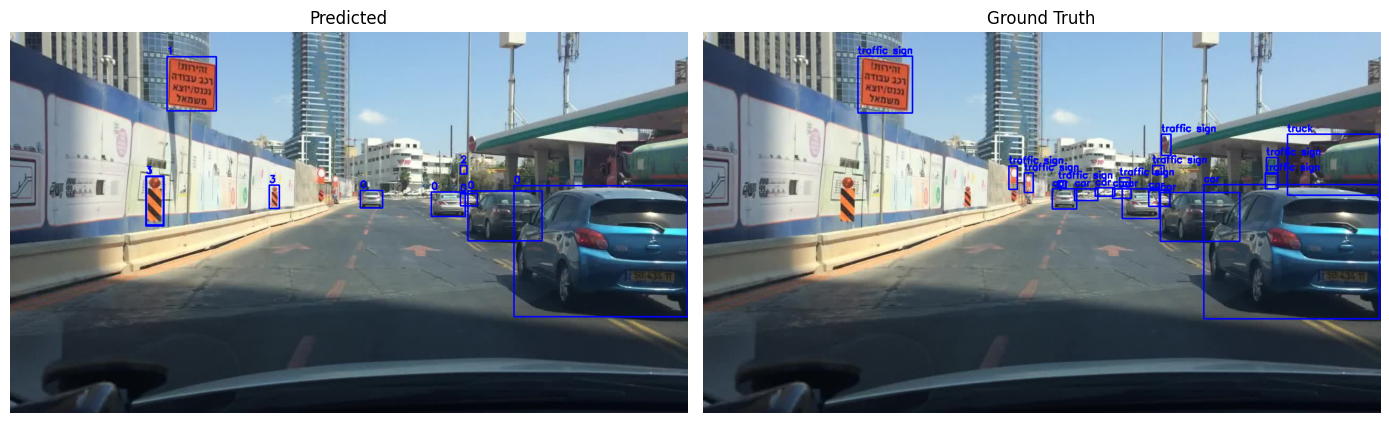


Evaluation for image: b728b79a-b1757497.jpg
Total GT objects     : 18
Predicted objects    : 10
Matched objects (IoU>=0.5) : 7
Precision            : 0.70
Recall               : 0.39
Correct class ratio  : 0.86


In [5]:
import cv2
import json
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# Параметры
image_path = r"C:\Users\odara\Downloads\data\val\images\b728b79a-b1757497.jpg"
model_path = r"C:\Users\odara\Downloads\data\yolo_fine_tuning\yolov8n_bdd100k\weights\best.pt"
bdd_labels_path = r"C:\Users\odara\Downloads\data\labels_new\bdd100k_labels_images_val.json"
iou_threshold = 0.5

# Загрузка модели YOLOv8
model = YOLO(model_path)

# Предсказания YOLO
results = model(image_path)[0]

# Координаты и классы предсказанных объектов
pred_boxes = results.boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]
pred_classes = results.boxes.cls.cpu().numpy().astype(int)
pred_scores = results.boxes.conf.cpu().numpy()

# Загрузка аннотаций BDD100K
with open(bdd_labels_path, 'r') as f:
    bdd_data = json.load(f)

image_name = Path(image_path).name
gt_boxes = []
gt_classes = []

# Извлечение аннотаций для текущего изображения
for item in bdd_data:
    if item['name'] == image_name:
        for label in item['labels']:
            box2d = label.get('box2d')
            if box2d:
                x1, y1 = box2d['x1'], box2d['y1']
                x2, y2 = box2d['x2'], box2d['y2']
                gt_boxes.append([x1, y1, x2, y2])
                gt_classes.append(label['category'])
        break

# Сопоставление классов с YOLO (переопределите при необходимости)
class_names = model.names

def draw_boxes(image, boxes, classes, title, is_pred=False):
    image = image.copy()
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cls = classes[i]
        label = class_names[cls] if is_pred else cls
        color = (0, 255, 0) if is_pred else (255, 0, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, str(label), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

# Вывод изображений
original = cv2.imread(image_path)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
draw_boxes(original, pred_boxes, pred_classes, "Predicted")

plt.subplot(1, 2, 2)
draw_boxes(original, gt_boxes, gt_classes, "Ground Truth")

plt.tight_layout()
plt.show()

# Оценка качества предсказаний
def compute_iou(box1, box2):
    # box: [x1, y1, x2, y2]
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2]-box1[0]) * (box1[3]-box1[1])
    box2_area = (box2[2]-box2[0]) * (box2[3]-box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0

# Сравнение предсказаний с GT
matched = 0
correct_class = 0

used_gt = set()
for i, pbox in enumerate(pred_boxes):
    for j, gtbox in enumerate(gt_boxes):
        if j in used_gt:
            continue
        iou = compute_iou(pbox, gtbox)
        if iou >= iou_threshold:
            matched += 1
            used_gt.add(j)
            if class_names[pred_classes[i]] == gt_classes[j]:
                correct_class += 1
            break

total_gt = len(gt_boxes)
precision = matched / len(pred_boxes) if pred_boxes.any() else 0
recall = matched / total_gt if total_gt else 0
cls_accuracy = correct_class / matched if matched else 0

print(f"\nEvaluation for image: {image_name}")
print(f"Total GT objects     : {total_gt}")
print(f"Predicted objects    : {len(pred_boxes)}")
print(f"Matched objects (IoU>={iou_threshold}) : {matched}")
print(f"Precision            : {precision:.2f}")
print(f"Recall               : {recall:.2f}")
print(f"Correct class ratio  : {cls_accuracy:.2f}")


image 1/1 C:\Users\odara\Downloads\data\val\images\ba9f23d8-a50cd80e.jpg: 448x768 15 cars, 5 traffic signs, 6 traffic lights, 10.2ms
Speed: 1.4ms preprocess, 10.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 768)


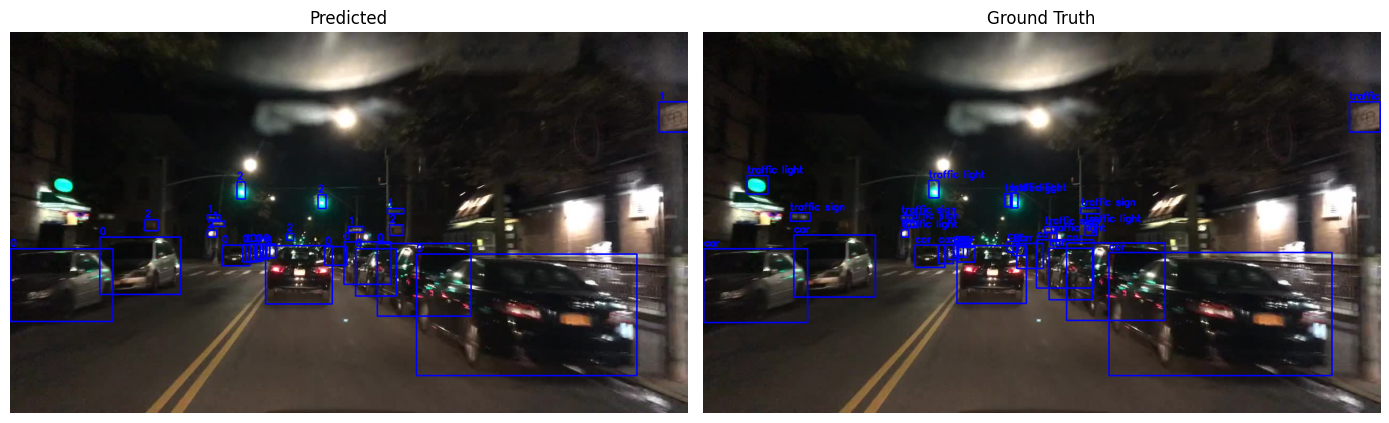


Evaluation for image: ba9f23d8-a50cd80e.jpg
Total GT objects     : 29
Predicted objects    : 26
Matched objects (IoU>=0.5) : 21
Precision            : 0.81
Recall               : 0.72
Correct class ratio  : 1.00


In [8]:
import cv2
import json
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# Параметры
image_path = r"C:\Users\odara\Downloads\data\val\images\ba9f23d8-a50cd80e.jpg"
model_path = r"C:\Users\odara\Downloads\data\yolo_fine_tuning\yolov8n_bdd100k\weights\best.pt"
bdd_labels_path = r"C:\Users\odara\Downloads\data\labels_new\bdd100k_labels_images_val.json"
iou_threshold = 0.5

# Загрузка модели YOLOv8
model = YOLO(model_path)

# Предсказания YOLO
results = model(image_path)[0]

# Координаты и классы предсказанных объектов
pred_boxes = results.boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]
pred_classes = results.boxes.cls.cpu().numpy().astype(int)
pred_scores = results.boxes.conf.cpu().numpy()

# Загрузка аннотаций BDD100K
with open(bdd_labels_path, 'r') as f:
    bdd_data = json.load(f)

image_name = Path(image_path).name
gt_boxes = []
gt_classes = []

# Извлечение аннотаций для текущего изображения
for item in bdd_data:
    if item['name'] == image_name:
        for label in item['labels']:
            box2d = label.get('box2d')
            if box2d:
                x1, y1 = box2d['x1'], box2d['y1']
                x2, y2 = box2d['x2'], box2d['y2']
                gt_boxes.append([x1, y1, x2, y2])
                gt_classes.append(label['category'])
        break

# Сопоставление классов с YOLO (переопределите при необходимости)
class_names = model.names

def draw_boxes(image, boxes, classes, title, is_pred=False):
    image = image.copy()
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cls = classes[i]
        label = class_names[cls] if is_pred else cls
        color = (0, 255, 0) if is_pred else (255, 0, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, str(label), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

# Вывод изображений
original = cv2.imread(image_path)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
draw_boxes(original, pred_boxes, pred_classes, "Predicted")

plt.subplot(1, 2, 2)
draw_boxes(original, gt_boxes, gt_classes, "Ground Truth")

plt.tight_layout()
plt.show()

# Оценка качества предсказаний
def compute_iou(box1, box2):
    # box: [x1, y1, x2, y2]
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2]-box1[0]) * (box1[3]-box1[1])
    box2_area = (box2[2]-box2[0]) * (box2[3]-box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0

# Сравнение предсказаний с GT
matched = 0
correct_class = 0

used_gt = set()
for i, pbox in enumerate(pred_boxes):
    for j, gtbox in enumerate(gt_boxes):
        if j in used_gt:
            continue
        iou = compute_iou(pbox, gtbox)
        if iou >= iou_threshold:
            matched += 1
            used_gt.add(j)
            if class_names[pred_classes[i]] == gt_classes[j]:
                correct_class += 1
            break

total_gt = len(gt_boxes)
precision = matched / len(pred_boxes) if pred_boxes.any() else 0
recall = matched / total_gt if total_gt else 0
cls_accuracy = correct_class / matched if matched else 0

print(f"\nEvaluation for image: {image_name}")
print(f"Total GT objects     : {total_gt}")
print(f"Predicted objects    : {len(pred_boxes)}")
print(f"Matched objects (IoU>={iou_threshold}) : {matched}")
print(f"Precision            : {precision:.2f}")
print(f"Recall               : {recall:.2f}")
print(f"Correct class ratio  : {cls_accuracy:.2f}")